## CLUSTERING ASSIGNMENT

In [124]:
#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Visulaisation
import matplotlib.pyplot as plt
%matplotlib inline

#Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

#To Scale our data
from sklearn.preprocessing import StandardScaler

#To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading and understanding the data 

In [125]:
#Reading the dataset
country_data = pd.read_csv("Country-data.csv")
country_data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [126]:
#Checking shape of the dataframe
country_data.shape

(167, 10)

In [127]:
#Checking information of the dataframe
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [128]:
#Describing the dataframe
country_data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [129]:
#Missing value check
round(100*(country_data.isnull().sum())/len(country_data), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

<b>There seems to be no missing value in the dataset.</b>

In [130]:
#Checking for duplicates

#Checking shape before dropping duplicates
country_data.shape

(167, 10)

In [8]:
#Now dropping duplicates
country_data.drop_duplicates(subset=None, inplace=True)

In [131]:
#Checking shape again
country_data.shape

(167, 10)

<b>Shape of the dataframe before and after dropping duplicates is same hence, we can conclude that there are no duplicates in the dataframe.</b>

## Data Transformation

In [132]:
#Checking the values before transformation
country_data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [133]:
#Converting imports, exports and health percentages to absolute values.

country_data['imports'] = country_data['imports'] * country_data['gdpp']/100
country_data['exports'] = country_data['exports'] * country_data['gdpp']/100
country_data['health'] = country_data['health'] * country_data['gdpp']/100

country_data.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

## Outlier Analysis

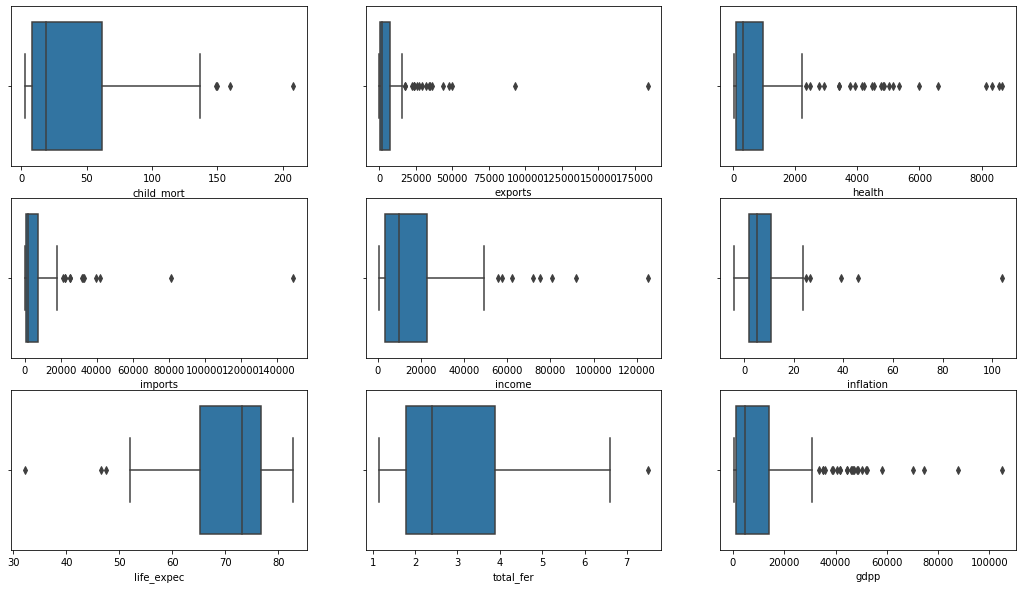

In [134]:
#Checking the outlier values for each variable by plotting box plot
plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.boxplot(country_data.child_mort)
plt.subplot(3, 3, 2)
sns.boxplot(country_data.exports)
plt.subplot(3, 3, 3)
sns.boxplot(country_data.health)
plt.subplot(3, 3, 4)
sns.boxplot(country_data.imports)
plt.subplot(3, 3, 5)
sns.boxplot(country_data.income)
plt.subplot(3, 3, 6)
sns.boxplot(country_data.inflation)
plt.subplot(3, 3, 7)
sns.boxplot(country_data.life_expec)
plt.subplot(3, 3, 8)
sns.boxplot(country_data.total_fer)
plt.subplot(3, 3, 9)
sns.boxplot(country_data.gdpp)
plt.show()

<b>NOTE:</b> There seem to be outlier in every single variable. If we try to treat the outliers this might remove some of the countries which may be required to be part of the final model. Hence, we will go ahead without treating outliers.

## Exploratory Data Analysis

### Data Visualisation

In [135]:
#Plotting pairplot for all numeric variables

country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


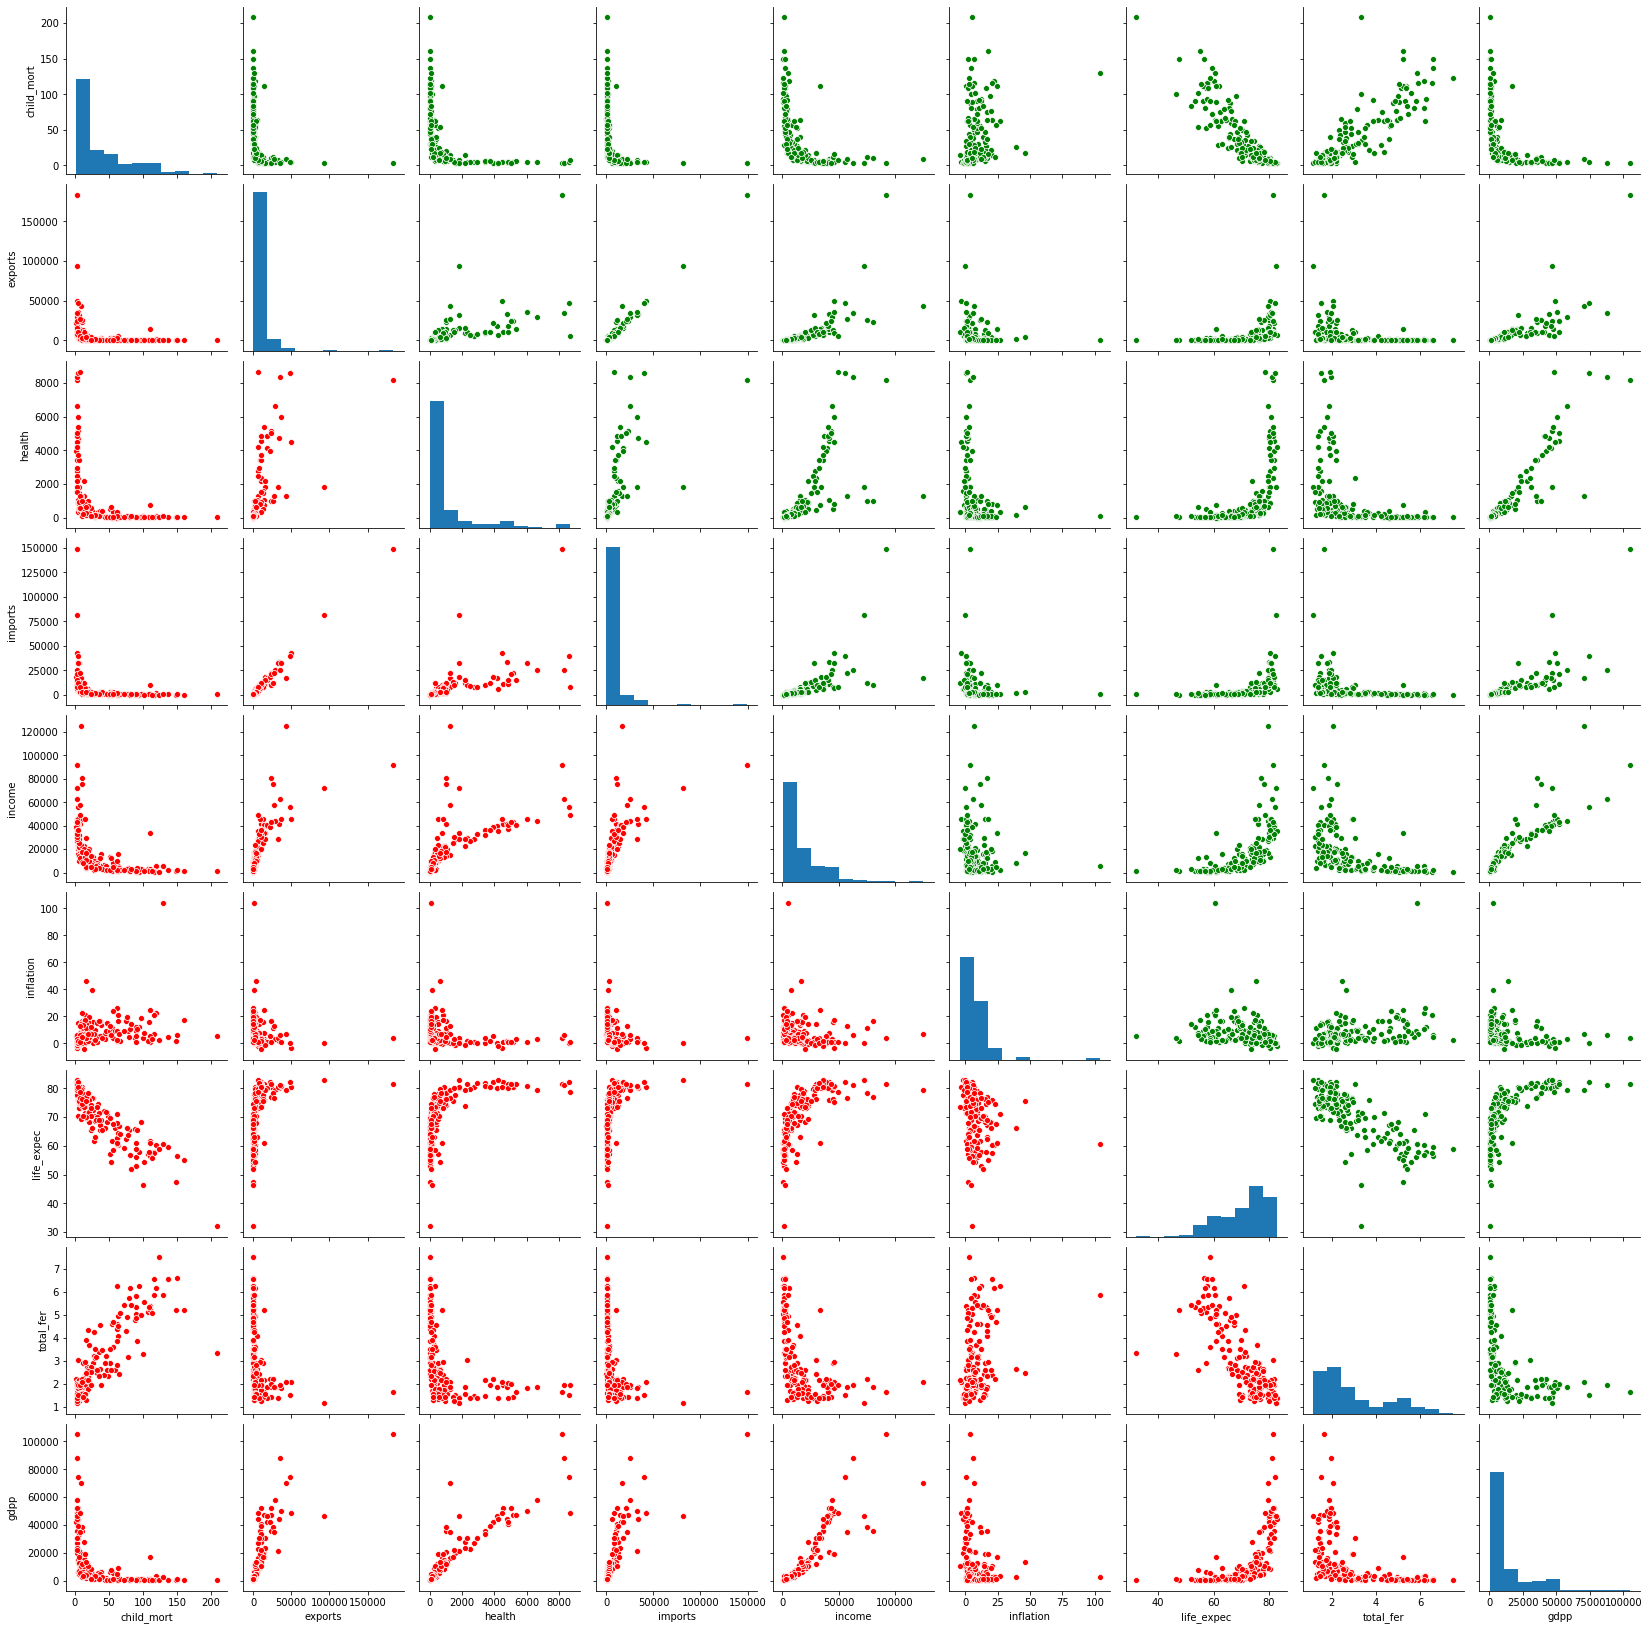

In [137]:
#From above, we know that except 'country' all other columns are numeric
country_data_num = country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

c = sns.PairGrid(country_data_num)
c.map_upper(sns.scatterplot,color='green')
c.map_lower(sns.scatterplot, color='red')
c.map_diag(plt.hist)

plt.show()

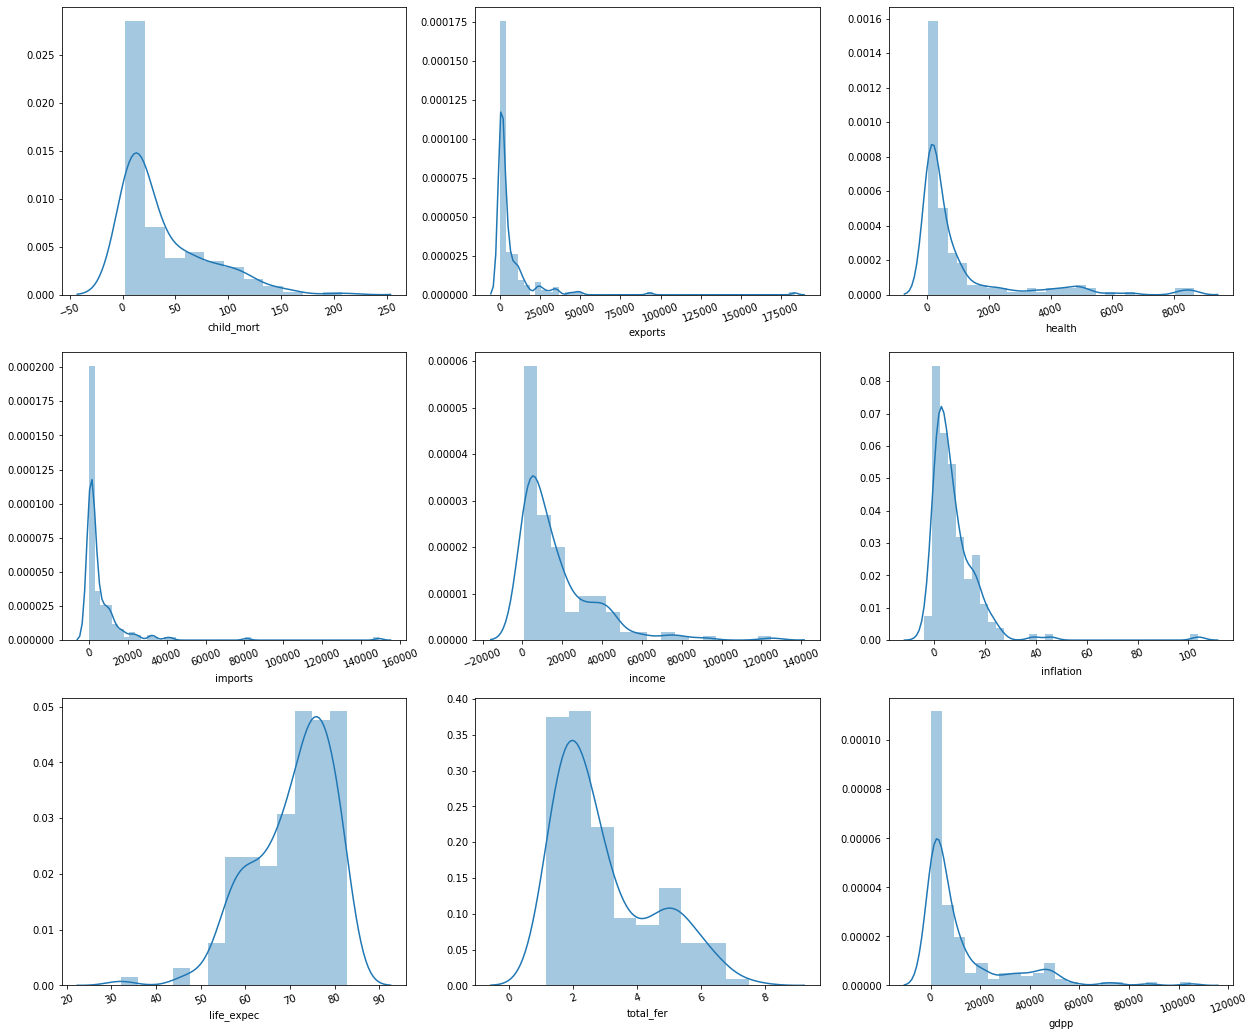

In [138]:
plt.figure(figsize=(21, 18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(country_data_num[i[1]])
    plt.xticks(rotation=20)

<b>As can be seen from above plots - most of the data points are not normally distributed. Their range and variance differs. So, we need to standardise the data before we build a model.</b>

## Data Scaling

In [139]:
# Creating new Dataframe with only numeric columns for scaling as we know except country all other columns are numeric

country_data_only_num = country_data[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 
                                      'life_expec', 'total_fer', 'gdpp']].copy()

In [140]:
# Checking if new dataframe is correctly created

country_data_only_num.head()

child_mort  exports    health   imports  income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297    1610       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740    9930       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440   12900      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370    5900      22.40        60.1   
4        10.3  5551.00  735.6600  7185.800   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [141]:
# Rescaling the new dataframe

scaler = StandardScaler()
country_data_only_num_scaled = scaler.fit_transform(country_data_only_num)

# Checking shape of the scaled data
country_data_only_num_scaled.shape

(167, 9)

In [142]:
country_data_only_num_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [143]:
#Converting scaled data into a dataframe

country_data_only_num_scaled = pd.DataFrame(country_data_only_num_scaled)
country_data_only_num_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
country_data_only_num_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.411011 -0.565040 -0.432276 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.350191 -0.439218 -0.313677 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   0.789274    0.670423   
3    2.007808 -0.291375 -0.532363 -0.345953 -0.585043   1.387054   -1.179234   
4   -0.695634 -0.104331 -0.178771  0.040735  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

## Hopkins Statistics

In [144]:
#Defining Hopkins method to pass dataframe for further analysis
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [153]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_data_only_num_scaled)

0.9225013566815788

<b>This value 0.92 indicates that data is highly clusterable i.e. good for cluster analysis.

## Data Modelling

### 1. Hierarchical Clustering

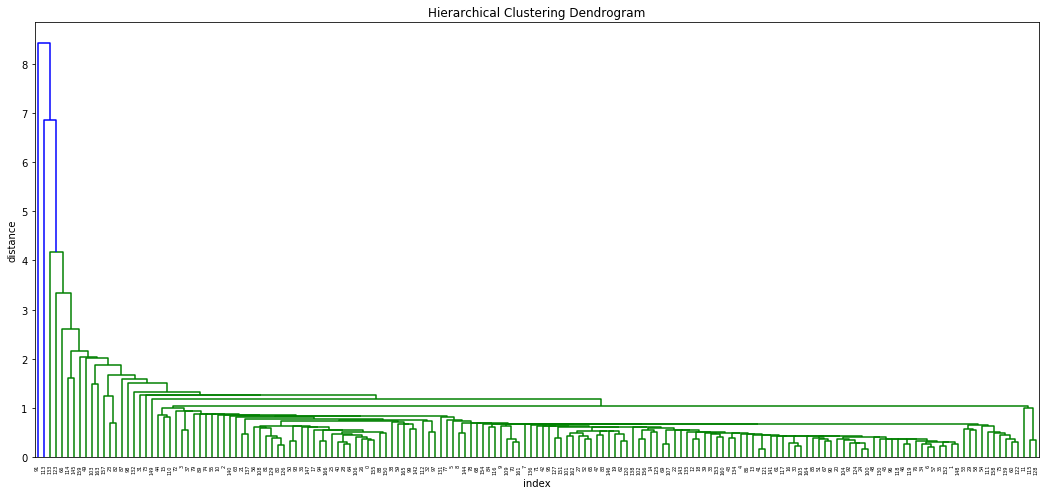

In [154]:
#Single Linkage

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
single_linkage = linkage(country_data_only_num_scaled, method="single", metric='euclidean')
dendrogram(single_linkage)
plt.show()

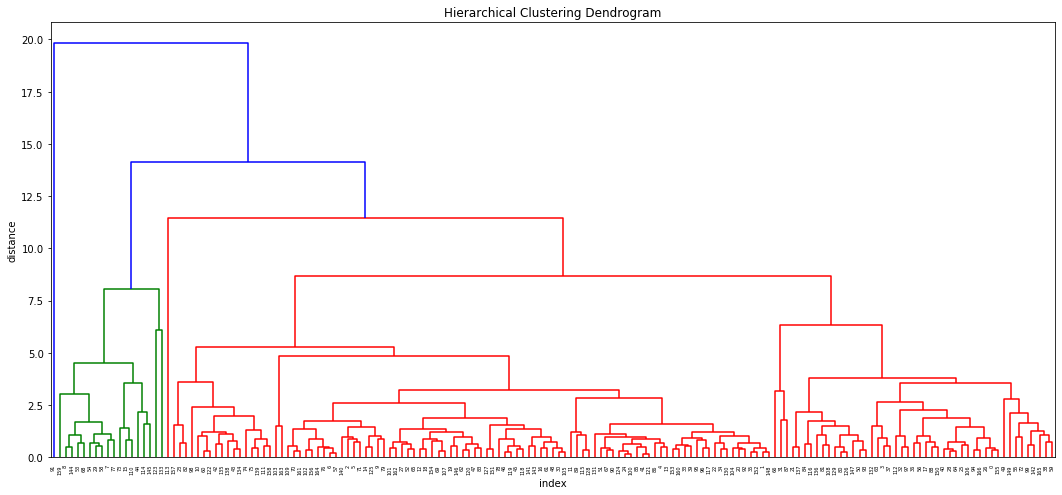

In [155]:
# Complete Linkage

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
complete_linkage = linkage(country_data_only_num_scaled, method="complete", metric='euclidean')
dendrogram(complete_linkage)
plt.show()

<b>NOTE:</b> From the above Dendrograms, it is clear that 'Complete Linkage' gives a better cluster formation. So we will proceed with Complete linkage output for our further analysis. 

#### FIRST ITERATION - USING 3 CLUSTERS

In [156]:
#3 clusters
cluster_labels_3 = cut_tree(complete_linkage, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [157]:
#Creating a new datafame with cluster labels
country_data_HC = country_data.copy()
country_data_HC['cluster_labels_3'] = cluster_labels_3

country_data_HC.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  
0       9.44        56.2       5.82    553                 0  
1       4.49        76.3       1.65   4090                 0  
2      16.10        76.5       2.89   4460                 0  
3      22.40        60.1       6.16   3530                 0  
4       1.44        76.8       2.13  12200                 0

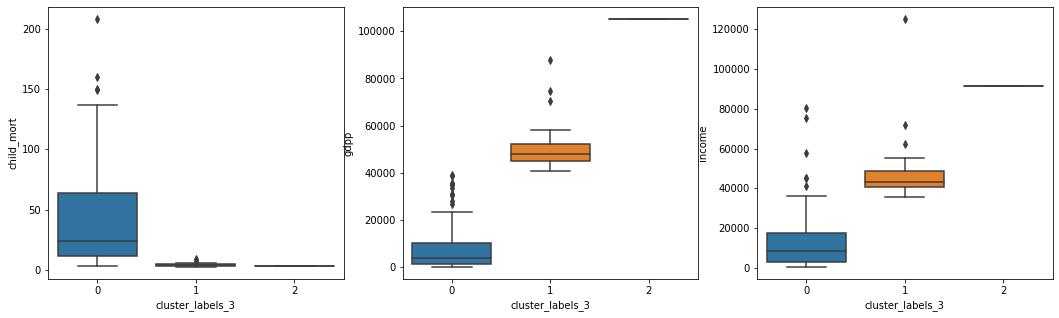

In [158]:
#Plotting Box plot for various variables against the cluster_id to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_3', y='child_mort', data=country_data_HC)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_3', y='gdpp', data=country_data_HC)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_3', y='income', data=country_data_HC)

plt.show()

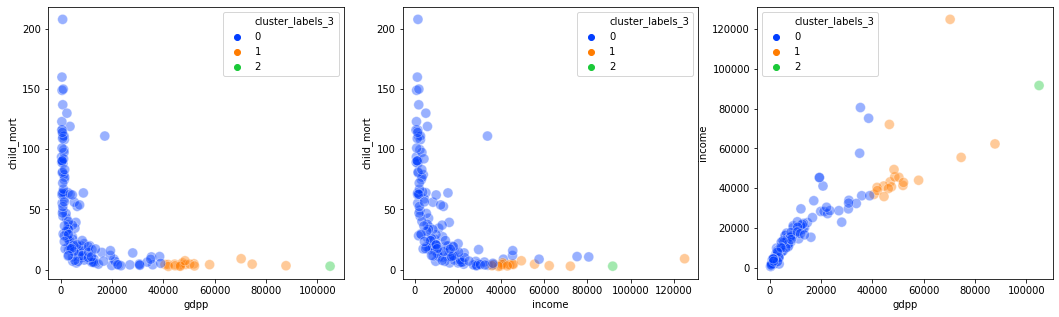

In [159]:
#Plotting Scatter plot for various variables to visualize the clusters

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_3',
                data=country_data_HC, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_3',
                data=country_data_HC, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_3',
                data=country_data_HC, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.show()

In [160]:
#Checking cluster count

country_data_HC.cluster_labels_3.value_counts()

0    148
1     18
2      1
Name: cluster_labels_3, dtype: int64

In [161]:
country_data_HC[country_data_HC['cluster_labels_3'] == 2]

country  child_mort   exports  health   imports  income  inflation  \
91  Luxembourg         2.8  183750.0  8158.5  149100.0   91700       3.62   

    life_expec  total_fer    gdpp  cluster_labels_3  
91        81.3       1.63  105000                 2

In [162]:
#Checking the countries in Cluster 1 to see which are the countries in that segment.

country_data_HC[country_data_HC['cluster_labels_3'] == 1]

country  child_mort  exports   health  imports  income  inflation  \
7        Australia         4.8  10276.2  4530.87  10847.1   41400      1.160   
8          Austria         4.3  24059.7  5159.00  22418.2   43200      0.873   
15         Belgium         4.5  33921.6  4750.80  33166.8   41100      1.880   
29          Canada         5.6  13793.4  5356.20  14694.0   40700      2.870   
44         Denmark         4.1  29290.0  6612.00  25288.0   44000      3.220   
53         Finland         3.0  17879.4  4134.90  17278.8   39800      0.351   
54          France         4.2  10880.8  4831.40  11408.6   36900      1.050   
58         Germany         4.2  17681.4  4848.80  15507.8   40400      0.758   
68         Iceland         2.6  22374.6  3938.60  18142.7   38800      5.470   
73         Ireland         4.2  50161.0  4475.53  42125.5   45700     -3.220   
77           Japan         3.2   6675.0  4223.05   6052.0   35800     -1.900   
110    Netherlands         4.5  36216.0  5985.70  31990.8   45500      0.848   
114         Norway         3.2  34856.6  8323.44  25023.0   62300      5.950   
123          Qatar         9.0  43796.9  1272.43  16731.4  125000      6.980   
133      Singapore         2.8  93200.0  1845.36  81084.0   72100     -0.046   
144         Sweden         3.0  24070.2  5017.23  21204.7   42900      0.991   
145    Switzerland         4.5  47744.0  8579.00  39761.8   55500      0.317   
159  United States         7.3   6001.6  8663.60   7647.2   49400      1.220   

     life_expec  total_fer   gdpp  cluster_labels_3  
7          82.0       1.93  51900                 1  
8          80.5       1.44  46900                 1  
15         80.0       1.86  44400                 1  
29         81.3       1.63  47400                 1  
44         79.5       1.87  58000                 1  
53         80.0       1.87  46200                 1  
54         81.4       2.03  40600                 1  
58         80.1       1.39  41800                 1  
68         82.0       2.20  41900                 1  
73         80.4       2.05  48700                 1  
77         82.8       1.39  44500                 1  
110        80.7       1.79  50300                 1  
114        81.0       1.95  87800                 1  
123        79.5       2.07  70300                 1  
133        82.7       1.15  46600                 1  
144        81.5       1.98  52100                 1  
145        82.2       1.52  74600                 1  
159        78.7       1.93  48400                 1

Cluster 1 & 2 seem to be Developed or Developing countries. So our segmentation is good in terms of all under developed countries as these are segmented under cluster 0.

#### SECOND ITERATION - USING 4 CLUSTERS

In [163]:
#4 clusters
cluster_labels_4 = cut_tree(complete_linkage, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [164]:
country_data_HC['cluster_labels_4'] = cluster_labels_4

country_data_HC.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  cluster_labels_4  
0       9.44        56.2       5.82    553                 0                 0  
1       4.49        76.3       1.65   4090                 0                 0  
2      16.10        76.5       2.89   4460                 0                 0  
3      22.40        60.1       6.16   3530                 0                 0  
4       1.44        76.8       2.13  12200                 0                 0

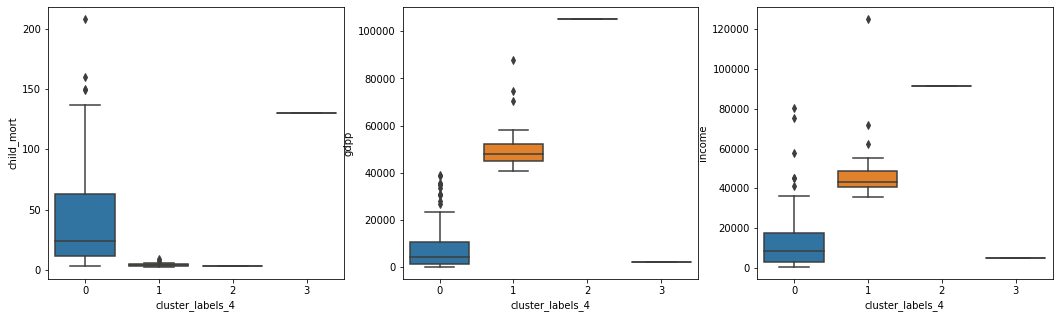

In [165]:
#Plotting Box plot for various variables against the cluster_id to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_4', y='child_mort', data=country_data_HC)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_4', y='gdpp', data=country_data_HC)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_4', y='income', data=country_data_HC)

plt.show()

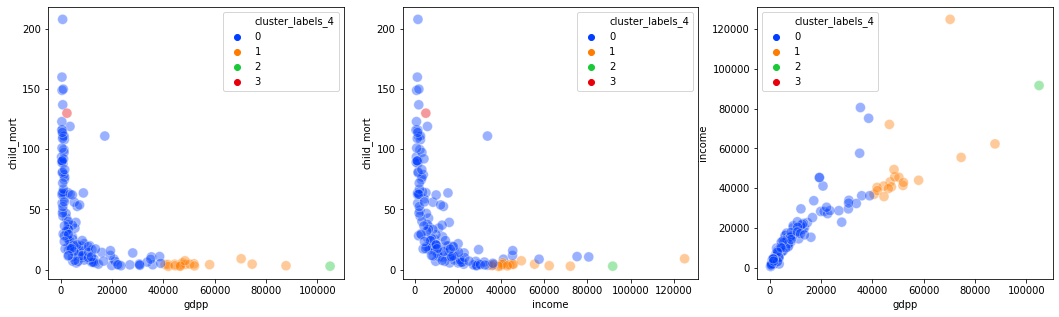

In [166]:
#Plotting Scatter plot for various variables to visualize the clusters

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_4',
                data=country_data_HC, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_4',
                data=country_data_HC, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_4',
                data=country_data_HC, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.show()

In [167]:
country_data_HC.cluster_labels_4.value_counts()

0    147
1     18
3      1
2      1
Name: cluster_labels_4, dtype: int64

In [168]:
#Checking the countries in Cluster 2 to see which are the countries in that segment.

country_data_HC[country_data_HC['cluster_labels_4'] == 2]

country  child_mort   exports  health   imports  income  inflation  \
91  Luxembourg         2.8  183750.0  8158.5  149100.0   91700       3.62   

    life_expec  total_fer    gdpp  cluster_labels_3  cluster_labels_4  
91        81.3       1.63  105000                 2                 2

In [169]:
#Checking the countries in Cluster 3 to see which are the countries in that segment.

country_data_HC[country_data_HC['cluster_labels_4'] == 3]

country  child_mort  exports   health  imports  income  inflation  \
113  Nigeria       130.0   589.49  118.131   405.42    5150      104.0   

     life_expec  total_fer  gdpp  cluster_labels_3  cluster_labels_4  
113        60.5       5.84  2330                 0                 3

In [170]:
#Checking the countries in Cluster 1 to see which are the countries in that segment.

country_data_HC[country_data_HC['cluster_labels_4'] == 1]

country  child_mort  exports   health  imports  income  inflation  \
7        Australia         4.8  10276.2  4530.87  10847.1   41400      1.160   
8          Austria         4.3  24059.7  5159.00  22418.2   43200      0.873   
15         Belgium         4.5  33921.6  4750.80  33166.8   41100      1.880   
29          Canada         5.6  13793.4  5356.20  14694.0   40700      2.870   
44         Denmark         4.1  29290.0  6612.00  25288.0   44000      3.220   
53         Finland         3.0  17879.4  4134.90  17278.8   39800      0.351   
54          France         4.2  10880.8  4831.40  11408.6   36900      1.050   
58         Germany         4.2  17681.4  4848.80  15507.8   40400      0.758   
68         Iceland         2.6  22374.6  3938.60  18142.7   38800      5.470   
73         Ireland         4.2  50161.0  4475.53  42125.5   45700     -3.220   
77           Japan         3.2   6675.0  4223.05   6052.0   35800     -1.900   
110    Netherlands         4.5  36216.0  5985.70  31990.8   45500      0.848   
114         Norway         3.2  34856.6  8323.44  25023.0   62300      5.950   
123          Qatar         9.0  43796.9  1272.43  16731.4  125000      6.980   
133      Singapore         2.8  93200.0  1845.36  81084.0   72100     -0.046   
144         Sweden         3.0  24070.2  5017.23  21204.7   42900      0.991   
145    Switzerland         4.5  47744.0  8579.00  39761.8   55500      0.317   
159  United States         7.3   6001.6  8663.60   7647.2   49400      1.220   

     life_expec  total_fer   gdpp  cluster_labels_3  cluster_labels_4  
7          82.0       1.93  51900                 1                 1  
8          80.5       1.44  46900                 1                 1  
15         80.0       1.86  44400                 1                 1  
29         81.3       1.63  47400                 1                 1  
44         79.5       1.87  58000                 1                 1  
53         80.0       1.87  46200                 1                 1  
54         81.4       2.03  40600                 1                 1  
58         80.1       1.39  41800                 1                 1  
68         82.0       2.20  41900                 1                 1  
73         80.4       2.05  48700                 1                 1  
77         82.8       1.39  44500                 1                 1  
110        80.7       1.79  50300                 1                 1  
114        81.0       1.95  87800                 1                 1  
123        79.5       2.07  70300                 1                 1  
133        82.7       1.15  46600                 1                 1  
144        81.5       1.98  52100                 1                 1  
145        82.2       1.52  74600                 1                 1  
159        78.7       1.93  48400                 1                 1

From the above 2 iterations of Hierarchical Clustering, it is evident that choosing 3 is ideal number of clusters, because when we used 4 clusters, we could see that Nigeria was added as a seperate segment. Since Nigeria could be a possible candidate for  aid in terms of their child mortality rate, we will consider the ideal number of cluster to be 3. 

### Interpretation of clusters from Hierarchical clustering model

In [171]:
# Creating new dataframe for analysis
country_data_HC_Analysis =  country_data_HC.groupby(['cluster_labels_3']).mean()
country_data_HC_Analysis

child_mort        exports       health        imports  \
cluster_labels_3                                                          
0                  42.630405    3598.749645   511.946183    3451.232447   
1                   4.388889   29048.800000  5141.550556   24465.133333   
2                   2.800000  183750.000000  8158.500000  149100.000000   

                        income  inflation  life_expec  total_fer  \
cluster_labels_3                                                   
0                 12641.641892   8.561986   69.224324   3.098851   
1                 50027.777778   1.598444   80.905556   1.780556   
2                 91700.000000   3.620000   81.300000   1.630000   

                           gdpp  cluster_labels_4  
cluster_labels_3                                   
0                   7551.445946           0.02027  
1                  52355.555556           1.00000  
2                 105000.000000           2.00000

In [172]:
#Creating a new column for count of observations in each cluster
country_data_HC_Analysis['Count']=country_data_HC[['cluster_labels_3','child_mort']].groupby(['cluster_labels_3']).count()
country_data_HC_Analysis

child_mort        exports       health        imports  \
cluster_labels_3                                                          
0                  42.630405    3598.749645   511.946183    3451.232447   
1                   4.388889   29048.800000  5141.550556   24465.133333   
2                   2.800000  183750.000000  8158.500000  149100.000000   

                        income  inflation  life_expec  total_fer  \
cluster_labels_3                                                   
0                 12641.641892   8.561986   69.224324   3.098851   
1                 50027.777778   1.598444   80.905556   1.780556   
2                 91700.000000   3.620000   81.300000   1.630000   

                           gdpp  cluster_labels_4  Count  
cluster_labels_3                                          
0                   7551.445946           0.02027    148  
1                  52355.555556           1.00000     18  
2                 105000.000000           2.00000      1

In [173]:
#Creating a new column for percentage of observations in each cluster
country_data_HC_Analysis['Percentage']=round(country_data_HC_Analysis['Count']/country_data_HC_Analysis['Count'].sum(),2)
country_data_HC_Analysis

child_mort        exports       health        imports  \
cluster_labels_3                                                          
0                  42.630405    3598.749645   511.946183    3451.232447   
1                   4.388889   29048.800000  5141.550556   24465.133333   
2                   2.800000  183750.000000  8158.500000  149100.000000   

                        income  inflation  life_expec  total_fer  \
cluster_labels_3                                                   
0                 12641.641892   8.561986   69.224324   3.098851   
1                 50027.777778   1.598444   80.905556   1.780556   
2                 91700.000000   3.620000   81.300000   1.630000   

                           gdpp  cluster_labels_4  Count  Percentage  
cluster_labels_3                                                      
0                   7551.445946           0.02027    148        0.89  
1                  52355.555556           1.00000     18        0.11  
2                 105000.000000           2.00000      1        0.01

<Figure size 576x360 with 0 Axes>

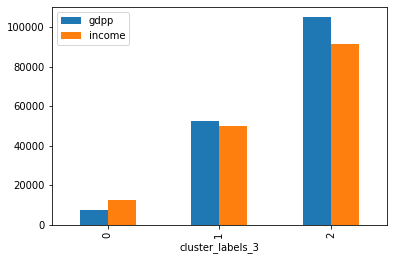

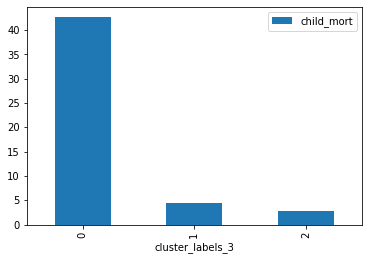

In [226]:
plt.figure(figsize=(8, 5))
country_data_HC_plot1=country_data_HC[['cluster_labels_3','gdpp','income']].copy()
country_data_HC_plot1=country_data_HC_plot1.groupby('cluster_labels_3').mean()
country_data_HC_plot1.plot.bar()

country_data_HC_plot2=country_data_HC[['cluster_labels_3','child_mort']].copy()
country_data_HC_plot2=country_data_HC_plot2.groupby('cluster_labels_3').mean()
country_data_HC_plot2.plot.bar()

Clearly, Cluster 0 has the highest average Child Mortality rate of 42.63 when compared to other clusters, and lowest average GDPP & Income of 7551.44 & 12641.64 respectively. Above estimates qualify this cluster to be the best candidate for the aid compared to other countries. We could also see that Cluster 0's percentage value is 89%, and has 148 count of observations compared to 167 total count of observations. This seems to be a problem. This means that Hierarchical clustering is not giving us a good result as 89% of the data points are segmented into that cluster. We also saw that increasing the cluster number is not solving this problem. We also need to perform K-means clustering to look out the problem deeply.

###  2. K-MEANS CLUSTERING

#### 1. Finding the optimal number or clusters using Elbow Curve method:

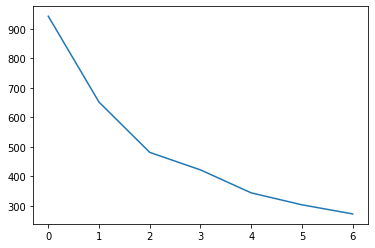

In [175]:
# Elbow Curve (SSD)
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_data_only_num_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#### 2. Finding the optimal number or clusters using Silhouette Analysis method:

In [176]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_data_only_num_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_data_only_num_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.39279369617575527
For n_clusters=7, the silhouette score is 0.3089394309554937
For n_clusters=8, the silhouette score is 0.320089363442564


From the above Elbow Curve & Silhouette Analysis, we could see that 3,4 or 5 clusters are optimal number of clusters to be used for analysing the results.

In [177]:
# K Means with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_3.fit(country_data_only_num_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=335, tol=0.0001, verbose=0)

In [178]:
kmeans_3.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [179]:
# Create a new datafame with scaled data and adding country name to it.
country_data_K = country_data_HC.copy()
country_data_K.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  cluster_labels_4  
0       9.44        56.2       5.82    553                 0                 0  
1       4.49        76.3       1.65   4090                 0                 0  
2      16.10        76.5       2.89   4460                 0                 0  
3      22.40        60.1       6.16   3530                 0                 0  
4       1.44        76.8       2.13  12200                 0                 0

In [180]:
country_data_K.shape

(167, 12)

In [181]:
#assigning the label
country_data_K['cluster_id_3'] = kmeans_3.labels_
country_data_K.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  \
0       9.44        56.2       5.82    553                 0   
1       4.49        76.3       1.65   4090                 0   
2      16.10        76.5       2.89   4460                 0   
3      22.40        60.1       6.16   3530                 0   
4       1.44        76.8       2.13  12200                 0   

   cluster_labels_4  cluster_id_3  
0                 0             2  
1                 0             0  
2                 0             0  
3                 0             2  
4                 0             0

In [182]:
#Checking the number of countries in each cluster

country_data_K.cluster_id_3.value_counts()

0    91
2    48
1    28
Name: cluster_id_3, dtype: int64

#### Visualizing the Clustered Data

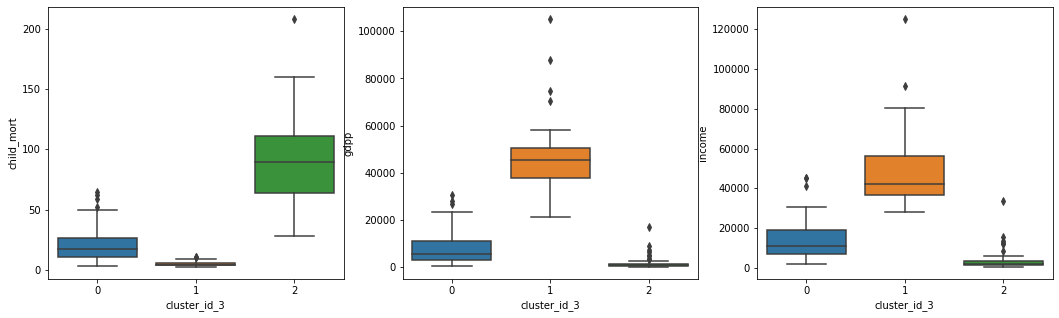

In [183]:
#Plotting Box plot for various variables against the clustering to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_3', y='child_mort',
            data=country_data_K)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_3', y='gdpp',
            data=country_data_K)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_3', y='income',
            data=country_data_K)

plt.show()

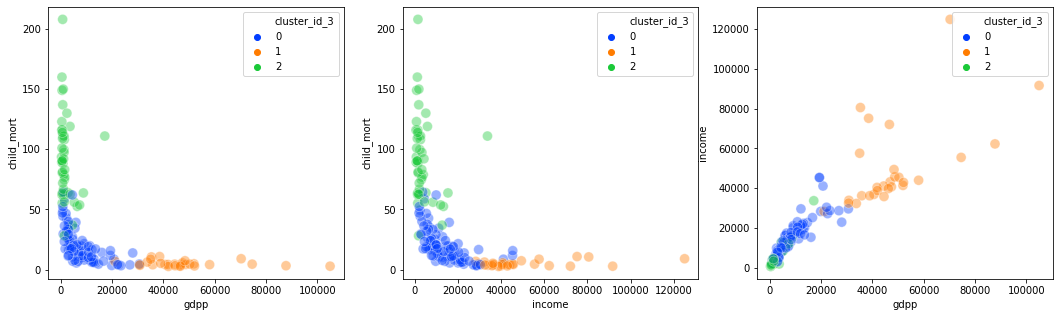

In [184]:
#Plotting Scatter plot for various variables to visualize the clusters

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_3',
                data=country_data_K, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_3',
                data=country_data_K, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_3',
                data=country_data_K, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.show()

In [185]:
#Checking the CLuster means:
country_data_K.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

child_mort       exports       health       imports  \
cluster_id_3                                                        
2              91.610417    879.063521   114.821765    827.028771   
0              20.357143   3604.149434   547.279455   3710.446386   
1               5.046429  31038.239286  4327.163214  25818.100000   

                    income  inflation  life_expec  total_fer          gdpp  \
cluster_id_3                                                                 
2              3897.354167  11.911146   59.239583   4.992083   1909.208333   
0             13968.021978   7.070549   73.460440   2.235055   7979.912088   
1             50178.571429   3.014679   80.514286   1.760714  48114.285714   

              cluster_labels_3  cluster_labels_4  
cluster_id_3                                      
2                     0.000000          0.062500  
0                     0.000000          0.000000  
1                     0.714286          0.714286

Cluster 0 & Cluster 2 seem to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.

In [186]:
#Checking the countries in Cluster 2 to see which are the countries in that segment.

country_data_K[['country','child_mort','income','gdpp']][country_data_K['cluster_id_3'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income   gdpp
66                      Haiti       208.0    1500    662
132              Sierra Leone       160.0    1220    399
32                       Chad       150.0    1930    897
31   Central African Republic       149.0     888    446
97                       Mali       137.0    1870    708
113                   Nigeria       130.0    5150   2330
112                     Niger       123.0     814    348
3                      Angola       119.0    5900   3530
37           Congo, Dem. Rep.       116.0     609    334
25               Burkina Faso       116.0    1430    575
64              Guinea-Bissau       114.0    1390    547
17                      Benin       111.0    1820    758
40              Cote d'Ivoire       111.0    2690   1220
49          Equatorial Guinea       111.0   33700  17100
63                     Guinea       109.0    1190    648
28                   Cameroon       108.0    2660   1310
106                Mozambique       101.0     918    419
87                    Lesotho        99.7    2380   1170
99                 Mauritania        97.4    3320   1200
26                    Burundi        93.6     764    231
116                  Pakistan        92.1    4280   1040
94                     Malawi        90.5    1030    459
150                      Togo        90.3    1210    488
0                 Afghanistan        90.2    1610    553
88                    Liberia        89.3     700    327
36                    Comoros        88.2    1410    769
166                    Zambia        83.1    3280   1460
155                    Uganda        81.0    1540    595
56                     Gambia        80.3    1660    562
84                        Lao        78.9    3980   1140
142                     Sudan        76.7    3370   1480
59                      Ghana        74.7    3060   1310
147                  Tanzania        71.9    2090    702
129                   Senegal        66.8    2180   1000
38                Congo, Rep.        63.9    5190   2740
55                      Gabon        63.7   15400   8750
126                    Rwanda        63.6    1350    563
81                   Kiribati        62.7    1730   1490
149               Timor-Leste        62.6    1850   3600
93                 Madagascar        62.2    1390    413
80                      Kenya        62.2    2480    967
165                     Yemen        56.3    4480   1310
108                   Namibia        56.0    8460   5190
50                    Eritrea        55.2    1420    482
137              South Africa        53.7   12000   7280
21                   Botswana        52.5   13300   6350
72                       Iraq        36.9   12700   4500
136           Solomon Islands        28.1    1780   1290

In [187]:
#Checking the countries in Cluster 0 to see which are the countries in that segment.

country_data_K[['country','child_mort','income','gdpp']][country_data_K['cluster_id_3'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income   gdpp
107         Myanmar        64.4    3720    988
154    Turkmenistan        62.0    9940   4440
69            India        58.8    4410   1350
146      Tajikistan        52.4    2110    738
12       Bangladesh        49.4    2440    758
..              ...         ...     ...    ...
138     South Korea         4.1   30400  22100
122        Portugal         3.9   27200  22500
60           Greece         3.9   28700  26900
43   Czech Republic         3.4   28300  19800
135        Slovenia         3.2   28700  23400

[91 rows x 4 columns]

#### Second Iteration - Using 4 clusteres

In [188]:
# K Means with k=4
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_4.fit(country_data_only_num_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=335, tol=0.0001, verbose=0)

In [189]:
kmeans_4.labels_

array([3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3,
       1, 2, 1, 3, 3, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 1,
       2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 1, 3, 3, 2, 1, 3, 1, 1, 3,
       3, 1, 1, 0, 1, 3, 3, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       2, 2, 3, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 0, 1, 2, 3, 3, 1, 2, 1, 1, 3, 1, 2, 2, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3])

In [190]:
#assigning the label
country_data_K['cluster_id_4'] = kmeans_4.labels_
country_data_K.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  \
0       9.44        56.2       5.82    553                 0   
1       4.49        76.3       1.65   4090                 0   
2      16.10        76.5       2.89   4460                 0   
3      22.40        60.1       6.16   3530                 0   
4       1.44        76.8       2.13  12200                 0   

   cluster_labels_4  cluster_id_3  cluster_id_4  
0                 0             2             3  
1                 0             0             1  
2                 0             0             1  
3                 0             2             3  
4                 0             0             1

In [191]:
#Checking the number of countries in each cluster

country_data_K.cluster_id_4.value_counts()

1    87
3    48
2    30
0     2
Name: cluster_id_4, dtype: int64

#### Visualising the Clustered Data

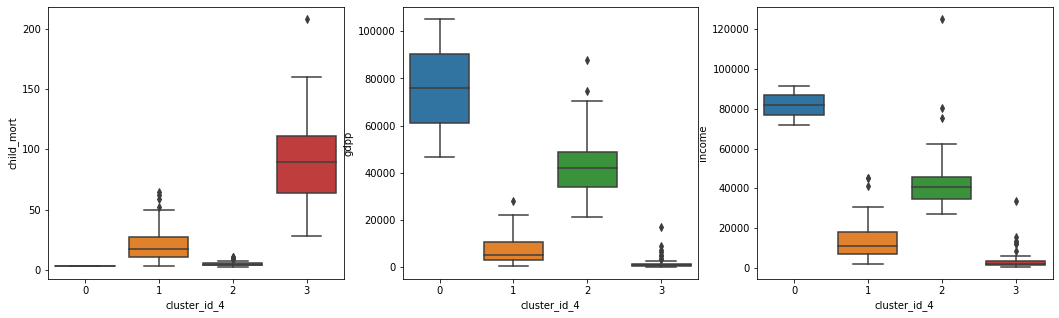

In [192]:
#Plotting Box plot for various variables against the cluster_id to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_4', y='child_mort',
            data=country_data_K)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_4', y='gdpp',
            data=country_data_K)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_4', y='income',
            data=country_data_K)

plt.show()

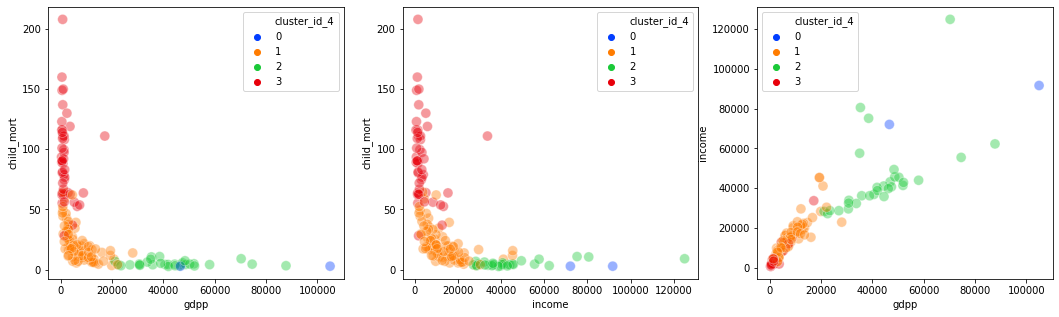

In [193]:
#Plotting Scatter plot for various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_4',
                data=country_data_K, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_4',
                data=country_data_K, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_4',
                data=country_data_K, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.show()

In [194]:
#Checking the cluster mean:
country_data_K.groupby(['cluster_id_4']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

child_mort        exports       health        imports  \
cluster_id_4                                                          
3              91.610417     879.063521   114.821765     827.028771   
1              21.113793    3328.149408   460.000120    3404.497944   
2               5.043333   21018.310000  4031.304333   17806.070000   
0               2.800000  138475.000000  5001.930000  115092.000000   

                    income  inflation  life_expec  total_fer          gdpp  \
cluster_id_4                                                                 
3              3897.354167  11.911146   59.239583   4.992083   1909.208333   
1             13297.586207   7.371506   73.147126   2.251954   7158.298851   
2             45180.000000   2.764533   80.383333   1.799667  43300.000000   
0             81900.000000   1.787000   82.000000   1.390000  75800.000000   

              cluster_labels_3  cluster_labels_4  cluster_id_3  
cluster_id_4                                                    
3                     0.000000          0.062500      2.000000  
1                     0.000000          0.000000      0.000000  
2                     0.566667          0.566667      0.866667  
0                     1.500000          1.500000      1.000000

Cluster 1 & Cluster 3 seem to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.

In [195]:
#Checking the countries in Cluster 3 to see which are the countries in that segment.

country_data_K[['country','child_mort','income','gdpp']][country_data_K['cluster_id_4'] == 3].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income   gdpp
66                      Haiti       208.0    1500    662
132              Sierra Leone       160.0    1220    399
32                       Chad       150.0    1930    897
31   Central African Republic       149.0     888    446
97                       Mali       137.0    1870    708
113                   Nigeria       130.0    5150   2330
112                     Niger       123.0     814    348
3                      Angola       119.0    5900   3530
37           Congo, Dem. Rep.       116.0     609    334
25               Burkina Faso       116.0    1430    575
64              Guinea-Bissau       114.0    1390    547
17                      Benin       111.0    1820    758
40              Cote d'Ivoire       111.0    2690   1220
49          Equatorial Guinea       111.0   33700  17100
63                     Guinea       109.0    1190    648
28                   Cameroon       108.0    2660   1310
106                Mozambique       101.0     918    419
87                    Lesotho        99.7    2380   1170
99                 Mauritania        97.4    3320   1200
26                    Burundi        93.6     764    231
116                  Pakistan        92.1    4280   1040
94                     Malawi        90.5    1030    459
150                      Togo        90.3    1210    488
0                 Afghanistan        90.2    1610    553
88                    Liberia        89.3     700    327
36                    Comoros        88.2    1410    769
166                    Zambia        83.1    3280   1460
155                    Uganda        81.0    1540    595
56                     Gambia        80.3    1660    562
84                        Lao        78.9    3980   1140
142                     Sudan        76.7    3370   1480
59                      Ghana        74.7    3060   1310
147                  Tanzania        71.9    2090    702
129                   Senegal        66.8    2180   1000
38                Congo, Rep.        63.9    5190   2740
55                      Gabon        63.7   15400   8750
126                    Rwanda        63.6    1350    563
81                   Kiribati        62.7    1730   1490
149               Timor-Leste        62.6    1850   3600
93                 Madagascar        62.2    1390    413
80                      Kenya        62.2    2480    967
165                     Yemen        56.3    4480   1310
108                   Namibia        56.0    8460   5190
50                    Eritrea        55.2    1420    482
137              South Africa        53.7   12000   7280
21                   Botswana        52.5   13300   6350
72                       Iraq        36.9   12700   4500
136           Solomon Islands        28.1    1780   1290

In [196]:
#Checking the countries in Cluster 1 to see which are the countries in that segment.

country_data_K[['country','child_mort','income','gdpp']][country_data_K['cluster_id_4'] == 1].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income   gdpp
107         Myanmar        64.4    3720    988
154    Turkmenistan        62.0    9940   4440
69            India        58.8    4410   1350
146      Tajikistan        52.4    2110    738
12       Bangladesh        49.4    2440    758
..              ...         ...     ...    ...
14          Belarus         5.5   16200   6030
41          Croatia         5.5   20100  13500
51          Estonia         4.5   22700  14600
138     South Korea         4.1   30400  22100
43   Czech Republic         3.4   28300  19800

[87 rows x 4 columns]

#### THIRD ITERATION - USING 5 CLUSTERS

In [197]:
# K Means with with k=4
kmeans_5 = KMeans(n_clusters=5, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_5.fit(country_data_only_num_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=335, tol=0.0001, verbose=0)

In [198]:
kmeans_5.labels_

array([0, 3, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 0,
       3, 1, 3, 0, 0, 3, 0, 1, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 1, 3,
       1, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 0, 0, 3, 1, 0, 1, 3, 3, 0, 0, 3,
       0, 3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 3, 3, 0, 0, 1, 3, 0, 3, 3, 0,
       0, 3, 3, 2, 3, 0, 0, 3, 3, 0, 1, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       1, 1, 0, 4, 1, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3,
       0, 1, 3, 1, 0, 0, 3, 1, 3, 3, 0, 3, 1, 1, 3, 0, 3, 0, 0, 3, 3, 3,
       3, 0, 3, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0])

In [199]:
#assigning the label
country_data_K['cluster_id_5'] = kmeans_5.labels_
country_data_K.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  \
0       9.44        56.2       5.82    553                 0   
1       4.49        76.3       1.65   4090                 0   
2      16.10        76.5       2.89   4460                 0   
3      22.40        60.1       6.16   3530                 0   
4       1.44        76.8       2.13  12200                 0   

   cluster_labels_4  cluster_id_3  cluster_id_4  cluster_id_5  
0                 0             2             3             0  
1                 0             0             1             3  
2                 0             0             1             3  
3                 0             2             3             0  
4                 0             0             1             3

In [200]:
#Checking the number of countries in each cluster

country_data_K.cluster_id_5.value_counts()

3    88
0    47
1    30
4     1
2     1
Name: cluster_id_5, dtype: int64

#### VISUALIZING THE CLUSTERED DATA

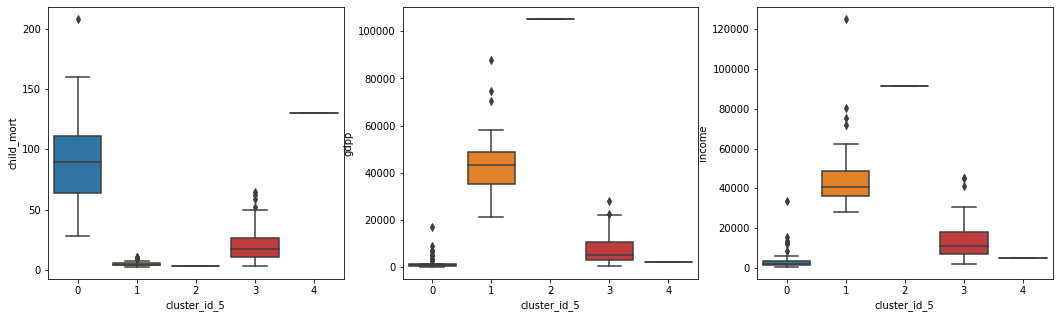

In [201]:
#Plotting Box plot for various variable against the cluster_id to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_5', y='child_mort',
            data=country_data_K)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_5', y='gdpp',
            data=country_data_K)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_5', y='income',
            data=country_data_K)

plt.show()

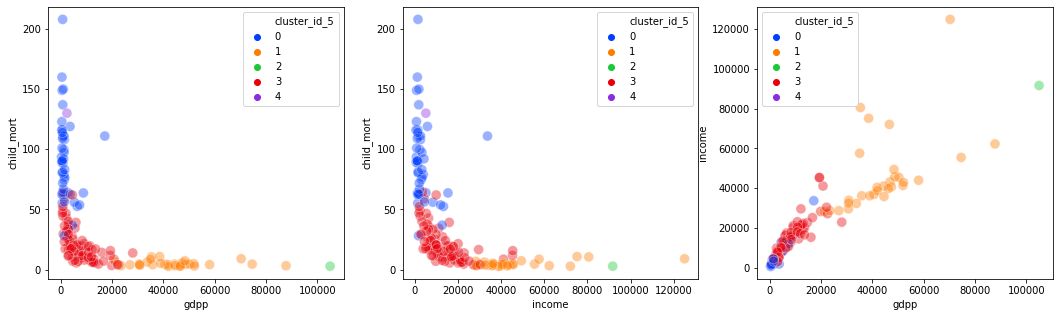

In [202]:
#Plotting Scatter plot for various variables to visualize the clusters

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_5',
                data=country_data_K, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_5',
                data=country_data_K, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_5',
                data=country_data_K, legend='full', palette="bright", s=100, c='cyan', alpha=.4)
plt.show()

In [203]:
country_data_K.groupby(['cluster_id_5']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

child_mort        exports       health        imports  \
cluster_id_5                                                          
4             130.000000     589.490000   118.131000     405.420000   
0              90.793617     885.224660   114.751355     835.999170   
3              20.918182    3366.778392   482.897845    3461.435467   
1               5.006667   23900.726667  4010.316333   20228.370000   
2               2.800000  183750.000000  8158.500000  149100.000000   

                    income   inflation  life_expec  total_fer           gdpp  \
cluster_id_5                                                                   
4              5150.000000  104.000000   60.500000   5.840000    2330.000000   
0              3870.702128    9.951809   59.212766   4.974043    1900.255319   
3             13455.568182    7.295045   73.222727   2.242159    7332.636364   
1             46676.666667    2.741567   80.480000   1.791667   44103.333333   
2             91700.000000    3.620000   81.300000   1.630000  105000.000000   

              cluster_labels_3  cluster_labels_4  cluster_id_3  cluster_id_4  
cluster_id_5                                                                  
4                          0.0               3.0           2.0      3.000000  
0                          0.0               0.0           2.0      3.000000  
3                          0.0               0.0           0.0      1.011364  
1                          0.6               0.6           0.9      1.933333  
2                          2.0               2.0           1.0      0.000000

Cluster 1 & Cluster 3 seem to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.

In [204]:
#Checking the countries in Cluster 3 to see which are the countries in that segment.

country_data_K[['country','child_mort','income','gdpp']][country_data_K['cluster_id_5'] == 4].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income  gdpp
113  Nigeria       130.0    5150  2330

In [205]:
#Checking the countries in Cluster 1 to see which are the countries in that segment.

country_data_K[['country','child_mort','income','gdpp']][country_data_K['cluster_id_5'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income   gdpp
66                      Haiti       208.0    1500    662
132              Sierra Leone       160.0    1220    399
32                       Chad       150.0    1930    897
31   Central African Republic       149.0     888    446
97                       Mali       137.0    1870    708
112                     Niger       123.0     814    348
3                      Angola       119.0    5900   3530
37           Congo, Dem. Rep.       116.0     609    334
25               Burkina Faso       116.0    1430    575
64              Guinea-Bissau       114.0    1390    547
17                      Benin       111.0    1820    758
40              Cote d'Ivoire       111.0    2690   1220
49          Equatorial Guinea       111.0   33700  17100
63                     Guinea       109.0    1190    648
28                   Cameroon       108.0    2660   1310
106                Mozambique       101.0     918    419
87                    Lesotho        99.7    2380   1170
99                 Mauritania        97.4    3320   1200
26                    Burundi        93.6     764    231
116                  Pakistan        92.1    4280   1040
94                     Malawi        90.5    1030    459
150                      Togo        90.3    1210    488
0                 Afghanistan        90.2    1610    553
88                    Liberia        89.3     700    327
36                    Comoros        88.2    1410    769
166                    Zambia        83.1    3280   1460
155                    Uganda        81.0    1540    595
56                     Gambia        80.3    1660    562
84                        Lao        78.9    3980   1140
142                     Sudan        76.7    3370   1480
59                      Ghana        74.7    3060   1310
147                  Tanzania        71.9    2090    702
129                   Senegal        66.8    2180   1000
38                Congo, Rep.        63.9    5190   2740
55                      Gabon        63.7   15400   8750
126                    Rwanda        63.6    1350    563
81                   Kiribati        62.7    1730   1490
149               Timor-Leste        62.6    1850   3600
93                 Madagascar        62.2    1390    413
80                      Kenya        62.2    2480    967
165                     Yemen        56.3    4480   1310
108                   Namibia        56.0    8460   5190
50                    Eritrea        55.2    1420    482
137              South Africa        53.7   12000   7280
21                   Botswana        52.5   13300   6350
72                       Iraq        36.9   12700   4500
136           Solomon Islands        28.1    1780   1290

## CHOOSING THE MODEL

From the above 3 Iterations of K-Means, it can be seen that using 3 Clusters provided a better output in terms of a balanced cluster size. Hence I am choosing 'K-Means with 3 Clusters' as the FINAL MODEL.

#### Interpreting the Clusters from K-Means model

In [207]:
#New dataframe for group by & analysis

country_data_K_analysis =  country_data_K.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
country_data_K_analysis

child_mort       exports       health       imports  \
cluster_id_3                                                        
2              91.610417    879.063521   114.821765    827.028771   
0              20.357143   3604.149434   547.279455   3710.446386   
1               5.046429  31038.239286  4327.163214  25818.100000   

                    income  inflation  life_expec  total_fer          gdpp  \
cluster_id_3                                                                 
2              3897.354167  11.911146   59.239583   4.992083   1909.208333   
0             13968.021978   7.070549   73.460440   2.235055   7979.912088   
1             50178.571429   3.014679   80.514286   1.760714  48114.285714   

              cluster_labels_3  cluster_labels_4  cluster_id_4  cluster_id_5  
cluster_id_3                                                                  
2                     0.000000          0.062500      3.000000      0.083333  
0                     0.000000          0.000000      1.043956      2.934066  
1                     0.714286          0.714286      1.857143      1.035714

In [208]:
# Creating a new field for count of observations in each cluster

country_data_K_analysis['Count']=country_data_K[['cluster_id_3','child_mort']].groupby(['cluster_id_3']).count()
country_data_K_analysis

child_mort       exports       health       imports  \
cluster_id_3                                                        
2              91.610417    879.063521   114.821765    827.028771   
0              20.357143   3604.149434   547.279455   3710.446386   
1               5.046429  31038.239286  4327.163214  25818.100000   

                    income  inflation  life_expec  total_fer          gdpp  \
cluster_id_3                                                                 
2              3897.354167  11.911146   59.239583   4.992083   1909.208333   
0             13968.021978   7.070549   73.460440   2.235055   7979.912088   
1             50178.571429   3.014679   80.514286   1.760714  48114.285714   

              cluster_labels_3  cluster_labels_4  cluster_id_4  cluster_id_5  \
cluster_id_3                                                                   
2                     0.000000          0.062500      3.000000      0.083333   
0                     0.000000          0.000000      1.043956      2.934066   
1                     0.714286          0.714286      1.857143      1.035714   

              Count  
cluster_id_3         
2                48  
0                91  
1                28

In [209]:
#Creating a new field for percentage of observations in each cluster

country_data_K_analysis['Percentage']=round(country_data_K_analysis['Count']/country_data_K_analysis['Count'].sum(),2)

#Summary View
country_data_K_analysis[['child_mort','income','gdpp','Count','Percentage']]

child_mort        income          gdpp  Count  Percentage
cluster_id_3                                                           
2              91.610417   3897.354167   1909.208333     48        0.29
0              20.357143  13968.021978   7979.912088     91        0.54
1               5.046429  50178.571429  48114.285714     28        0.17

<Figure size 576x360 with 0 Axes>

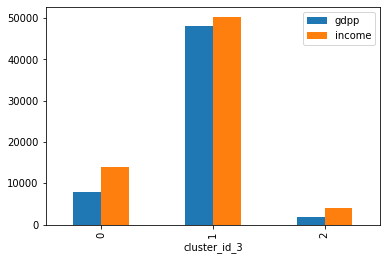

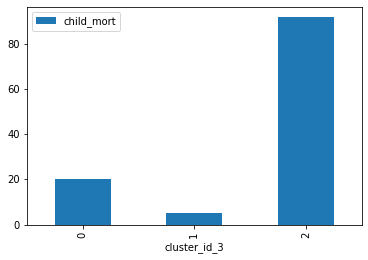

In [210]:
plt.figure(figsize=(8, 5))
country_data_K_plot1=country_data_K[['cluster_id_3','gdpp','income']].copy()
country_data_K_plot1=country_data_K_plot1.groupby('cluster_id_3').mean()
country_data_K_plot1.plot.bar()

country_data_K_plot2=country_data_K[['cluster_id_3','child_mort']].copy()
country_data_K_plot2=country_data_K_plot2.groupby('cluster_id_3').mean()
country_data_K_plot2.plot.bar()

Cluster 2 has the Highest average Child Mortality rate of 92.61 when compared to other clusters, and Lowest average GDPP & Income of 1909.20 & 3897.35 respectively. All these figures clearly make this cluster the best cluster for the aid. We could also see that Cluster 2 comprises of 29% of overall data, and has 48 count of observations compared to 167 total count.

#### RENAMING THE CLUSTERS

In [211]:
country_data_K_analysis = country_data_K_analysis.rename({
    2: 'Under Developed Countries',
    1: 'Developed Countries',
    0: 'Developing Countries'}).reset_index()

In [212]:
country_data_K_analysis[['cluster_id_3','child_mort','income','gdpp','Count','Percentage']]

cluster_id_3  child_mort        income          gdpp  Count  \
0  Under Developed Countries   91.610417   3897.354167   1909.208333     48   
1       Developing Countries   20.357143  13968.021978   7979.912088     91   
2        Developed Countries    5.046429  50178.571429  48114.285714     28   

   Percentage  
0        0.29  
1        0.54  
2        0.17

Final Cluster: As can be seen above, the Cluster 2 now has become 'Under Developed Countries'. I will analyse this cluster further so that final list of countries can be obtained which are in dire need of aid.

### ANALYSING THE 'UNDER DEVELOPED COUNTRIES' CLUSTER

In [213]:
#Saving second cluster data to a new dataframe to form final cluster

Final_Cluster = country_data_K[country_data_K['cluster_id_3'] == 2].copy()
Final_Cluster = Final_Cluster[['country', 'child_mort', 'income', 'gdpp']]

In [214]:
Final_Cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

country  child_mort  income   gdpp
26                    Burundi        93.6     764    231
88                    Liberia        89.3     700    327
37           Congo, Dem. Rep.       116.0     609    334
112                     Niger       123.0     814    348
132              Sierra Leone       160.0    1220    399
93                 Madagascar        62.2    1390    413
106                Mozambique       101.0     918    419
31   Central African Republic       149.0     888    446
94                     Malawi        90.5    1030    459
50                    Eritrea        55.2    1420    482
150                      Togo        90.3    1210    488
64              Guinea-Bissau       114.0    1390    547
0                 Afghanistan        90.2    1610    553
56                     Gambia        80.3    1660    562
126                    Rwanda        63.6    1350    563
25               Burkina Faso       116.0    1430    575
155                    Uganda        81.0    1540    595
63                     Guinea       109.0    1190    648
66                      Haiti       208.0    1500    662
147                  Tanzania        71.9    2090    702
97                       Mali       137.0    1870    708
17                      Benin       111.0    1820    758
36                    Comoros        88.2    1410    769
32                       Chad       150.0    1930    897
80                      Kenya        62.2    2480    967
129                   Senegal        66.8    2180   1000
116                  Pakistan        92.1    4280   1040
84                        Lao        78.9    3980   1140
87                    Lesotho        99.7    2380   1170
99                 Mauritania        97.4    3320   1200
40              Cote d'Ivoire       111.0    2690   1220
136           Solomon Islands        28.1    1780   1290
28                   Cameroon       108.0    2660   1310
59                      Ghana        74.7    3060   1310
165                     Yemen        56.3    4480   1310
166                    Zambia        83.1    3280   1460
142                     Sudan        76.7    3370   1480
81                   Kiribati        62.7    1730   1490
113                   Nigeria       130.0    5150   2330
38                Congo, Rep.        63.9    5190   2740
3                      Angola       119.0    5900   3530
149               Timor-Leste        62.6    1850   3600
72                       Iraq        36.9   12700   4500
108                   Namibia        56.0    8460   5190
21                   Botswana        52.5   13300   6350
137              South Africa        53.7   12000   7280
55                      Gabon        63.7   15400   8750
49          Equatorial Guinea       111.0   33700  17100

## MODEL SELECTION

In [215]:
Final_Cluster.describe()

child_mort        income          gdpp
count   48.000000     48.000000     48.000000
mean    91.610417   3897.354167   1909.208333
std     34.319855   5590.168621   2925.911009
min     28.100000    609.000000    231.000000
25%     63.675000   1390.000000    551.500000
50%     89.750000   1860.000000    932.000000
75%    111.000000   3522.500000   1465.000000
max    208.000000  33700.000000  17100.000000

## Fetching the final data based on Cluster median

### Data less than median of gdpp of the cluster

In [216]:
#As can be seen that the Median value of gdpp for 'Under Developed Countries' is 932. 
#So creating a dataframe with countries having gdpp less than this value.

Under_Developed_Countries = country_data[country_data['gdpp'] <= 932].copy()
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [113]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

country  child_mort  gdpp  income
26                    Burundi        93.6   231     764
88                    Liberia        89.3   327     700
37           Congo, Dem. Rep.       116.0   334     609
112                     Niger       123.0   348     814
132              Sierra Leone       160.0   399    1220
93                 Madagascar        62.2   413    1390
106                Mozambique       101.0   419     918
31   Central African Republic       149.0   446     888
94                     Malawi        90.5   459    1030
50                    Eritrea        55.2   482    1420
150                      Togo        90.3   488    1210
64              Guinea-Bissau       114.0   547    1390
0                 Afghanistan        90.2   553    1610
56                     Gambia        80.3   562    1660
126                    Rwanda        63.6   563    1350
25               Burkina Faso       116.0   575    1430
109                     Nepal        47.0   592    1990
155                    Uganda        81.0   595    1540
63                     Guinea       109.0   648    1190
66                      Haiti       208.0   662    1500
147                  Tanzania        71.9   702    2090
97                       Mali       137.0   708    1870
146                Tajikistan        52.4   738    2110
17                      Benin       111.0   758    1820
12                 Bangladesh        49.4   758    2440
36                    Comoros        88.2   769    1410
27                   Cambodia        44.4   786    2520
83            Kyrgyz Republic        29.6   880    2790
32                       Chad       150.0   897    1930

### Data less than median of income of the cluster

In [217]:
#As can be seen that the Median value of income for 'Under Developed Countries' is 1860. 
#So creating a dataframe with countries having gdpp less than this value.

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['income'] <= 1860]
Under_Developed_Countries = Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [218]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

country  child_mort  gdpp  income
26                    Burundi        93.6   231     764
88                    Liberia        89.3   327     700
37           Congo, Dem. Rep.       116.0   334     609
112                     Niger       123.0   348     814
132              Sierra Leone       160.0   399    1220
93                 Madagascar        62.2   413    1390
106                Mozambique       101.0   419     918
31   Central African Republic       149.0   446     888
94                     Malawi        90.5   459    1030
50                    Eritrea        55.2   482    1420
150                      Togo        90.3   488    1210
64              Guinea-Bissau       114.0   547    1390
0                 Afghanistan        90.2   553    1610
56                     Gambia        80.3   562    1660
126                    Rwanda        63.6   563    1350
25               Burkina Faso       116.0   575    1430
155                    Uganda        81.0   595    1540
63                     Guinea       109.0   648    1190
66                      Haiti       208.0   662    1500
17                      Benin       111.0   758    1820
36                    Comoros        88.2   769    1410

### Data greater than median of child mortality rate of the final cluster

In [219]:
#As can be seen that the Median value of child_mort for 'Under Developed Countries' is 90. 
#So creating a dataframe with countries having child_mort more than this value.

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['child_mort'] >= 90]
Under_Developed_Countries = Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [220]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

country  child_mort  gdpp  income
26                    Burundi        93.6   231     764
37           Congo, Dem. Rep.       116.0   334     609
112                     Niger       123.0   348     814
132              Sierra Leone       160.0   399    1220
106                Mozambique       101.0   419     918
31   Central African Republic       149.0   446     888
94                     Malawi        90.5   459    1030
150                      Togo        90.3   488    1210
64              Guinea-Bissau       114.0   547    1390
0                 Afghanistan        90.2   553    1610
25               Burkina Faso       116.0   575    1430
63                     Guinea       109.0   648    1190
66                      Haiti       208.0   662    1500
17                      Benin       111.0   758    1820

### Descriptive Statistics of Cluster 'Under_Developed_Countries'

In [221]:
#Saving the top 10 under developed countries list to a new dataframe

Under_Developed_Countries_Top_10=Under_Developed_Countries[['country', 'gdpp', 'income', 'child_mort']].head(10).copy()

In [222]:
#Final country list

Under_Developed_Countries_Top_10

country  gdpp  income  child_mort
26                    Burundi   231     764        93.6
37           Congo, Dem. Rep.   334     609       116.0
112                     Niger   348     814       123.0
132              Sierra Leone   399    1220       160.0
106                Mozambique   419     918       101.0
31   Central African Republic   446     888       149.0
94                     Malawi   459    1030        90.5
150                      Togo   488    1210        90.3
64              Guinea-Bissau   547    1390       114.0
0                 Afghanistan   553    1610        90.2

#### Univariate Analysis of Cluster 'Under_Developed_Countries'

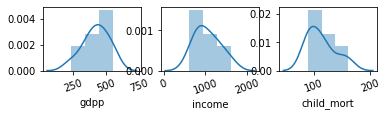

In [223]:
features = ['gdpp','income','child_mort']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(Under_Developed_Countries_Top_10[i[1]])
    plt.xticks(rotation=20)

### Bivariate Analysis of Cluster 'Under_Developed_Countries'

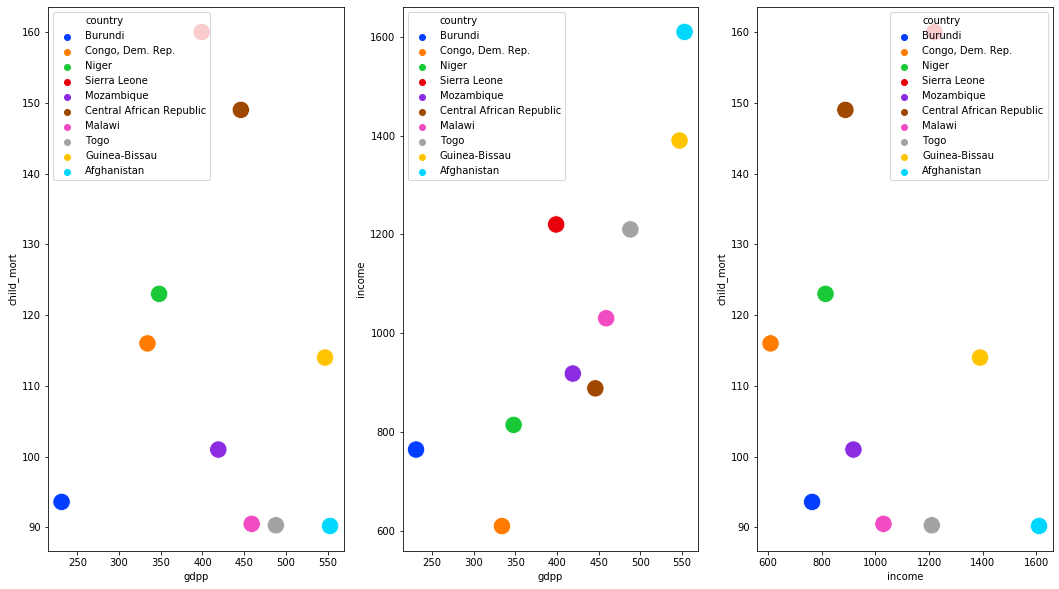

In [224]:
#Plotting Scatter plot for various variables to visualize the clusters

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=Under_Developed_Countries_Top_10, legend='full', palette="bright", s=300, c='cyan')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=Under_Developed_Countries_Top_10, legend='full', palette="bright", s=300, c='cyan')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=Under_Developed_Countries_Top_10, legend='full', palette="bright", s=300, c='cyan')
plt.show()

## CONCLUSION

Based on the above Clustering Analysis, the below top 10 countries under 'Under Developed Countries' cluster are in dire need of the aid.

In [227]:
#Final List of countries (Top 10) which are in dire need of aid

Under_Developed_Countries_Top_10

country  gdpp  income  child_mort
26                    Burundi   231     764        93.6
37           Congo, Dem. Rep.   334     609       116.0
112                     Niger   348     814       123.0
132              Sierra Leone   399    1220       160.0
106                Mozambique   419     918       101.0
31   Central African Republic   446     888       149.0
94                     Malawi   459    1030        90.5
150                      Togo   488    1210        90.3
64              Guinea-Bissau   547    1390       114.0
0                 Afghanistan   553    1610        90.2